<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<font size=+2>My Information:</font></b>

  Name</b>: [Venkata Sai Kumar Gottumukkala]
  </br>

  Student ID Number</b>:  [862393318]
  </br>
    
Some parts of this notebook are inspired from the Deep Learning Specilization course from [Deeplearning.ai](https://www.deeplearning.ai/courses/deep-learning-specialization/) offered on coursera that I am currently doing along with my CS228 Intro to Deep Learning course at UCR.
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Define transformation to apply to the data
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5,), (0.5,))])

# Load train and test datasets
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Print shapes of the datasets
print("Train data shape:", train_set.data.shape)
print("Train labels shape:", train_set.targets.shape)
print("Test data shape:", test_set.data.shape)
print("Test labels shape:", test_set.targets.shape)

Train data shape: torch.Size([60000, 28, 28])
Train labels shape: torch.Size([60000])
Test data shape: torch.Size([10000, 28, 28])
Test labels shape: torch.Size([10000])


In [3]:
# Formatting the data
X_train = train_set.data.reshape(train_set.data.shape[0], -1).T
y_train = train_set.targets
X_test = test_set.data.reshape(test_set.data.shape[0], -1).T
y_test = test_set.targets

print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

X_train shape: torch.Size([784, 60000])
y_train shape: torch.Size([60000])
X_test shape: torch.Size([784, 10000])
y_test shape: torch.Size([10000])


In [4]:
# Converting labes to one hot vectors
y_train = torch.eye(10)[y_train].T
y_test = torch.eye(10)[y_test].T

print('y_train_onehot shape:', y_train.shape)
print('y_test_onehot shape:', y_test.shape)

y_train_onehot shape: torch.Size([10, 60000])
y_test_onehot shape: torch.Size([10, 10000])


In [5]:
# Standardize the dataset
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
def predict(W, X):
    # W is of shape [10, 784] and X is of shape [784, m]
    h = torch.matmul(W, X)
    return h

def cost(X, y, W):
    # X is of shape [784, m], y is of shape [10, m] and W is of shape [10, 784].
    y_pred = predict(W, X)
    # y_ped is of shape [10, m]. We use torch.argmax(y, dim=0) changes y to the shape [m].
    J = (1/2)*torch.sum(((torch.argmax(y, dim=0) - torch.argmax(y_pred, dim=0))**2))
    return J

def random_minibatches(X, Y, mini_batch_size):
    m = X.shape[1]
    # First shuffle the X and y
    permutation = torch.randperm(m).tolist()
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    inc = mini_batch_size
    
    mini_batch_X = shuffled_X[:, 0:inc]
    mini_batch_y = shuffled_Y[:, 0:inc]
    
    mini_batch = (mini_batch_X, mini_batch_y) 
    
    return mini_batch

def SGD(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=64, learning_rate=0.01):
    W = torch.zeros((y_train.shape[0], X_train.shape[0]))
    loss = []    
    test_accuracy = []
    for itr in range(num_epochs):
        (minibatch_X, minibatch_y) = random_minibatches(X_train, y_train, batch_size)
        dW = 0
        for i in range(minibatch_X.shape[1]):
            X = minibatch_X[:, i].reshape(minibatch_X.shape[0],1)
            y = minibatch_y[:, i].reshape(minibatch_y.shape[0],1)
            h = predict(W, X)
            dW += torch.matmul((h - y),X.mT)
            
        dW = dW/minibatch_X.shape[1]
        W = W - learning_rate * dW
        loss.append(cost(minibatch_X, minibatch_y, W))
        y_hat = predict(W, X_test)
        test_accuracy.append(accuracy_score(np.argmax(y_test, axis=0), np.argmax(y_hat, axis=0)))
        
    cache = {"training_loss" : loss,
             "test_accuracy" : test_accuracy,
             "W": W
            }
    return cache

Time taken for training with batch size 1 is 329.03 seconds
Accuracy of the classifier: 0.7482


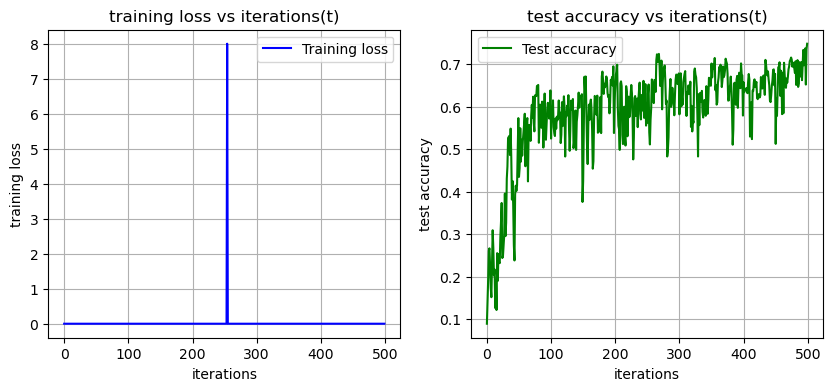

Time taken for training with batch size 10 is 331.12 seconds
Accuracy of the classifier: 0.8336


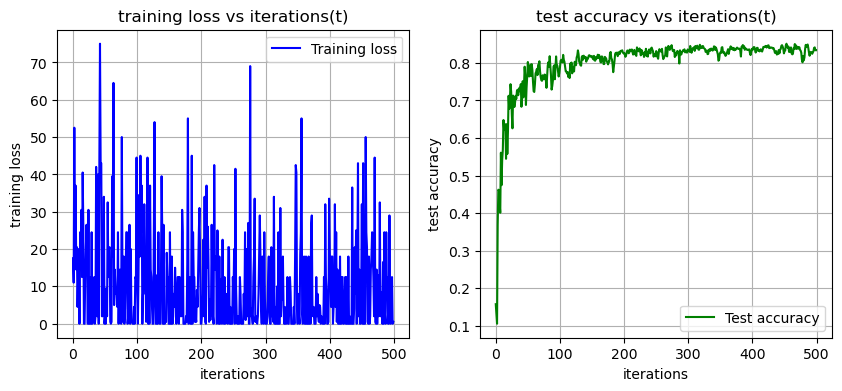

Time taken for training with batch size 100 is 333.82 seconds
Accuracy of the classifier: 0.8507


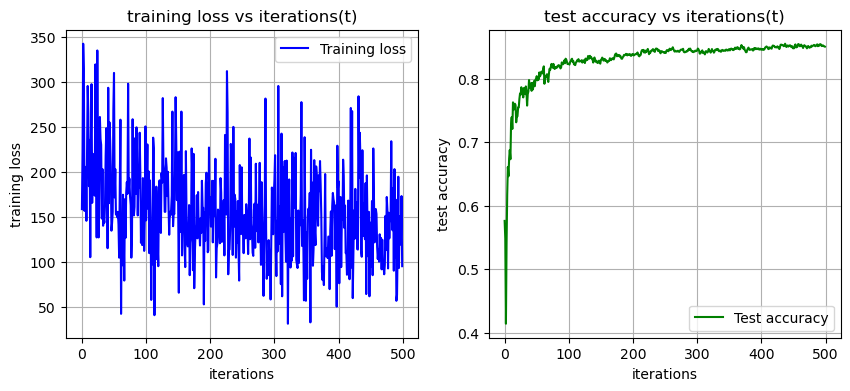

Time taken for training with batch size 1000 is 348.26 seconds
Accuracy of the classifier: 0.8522


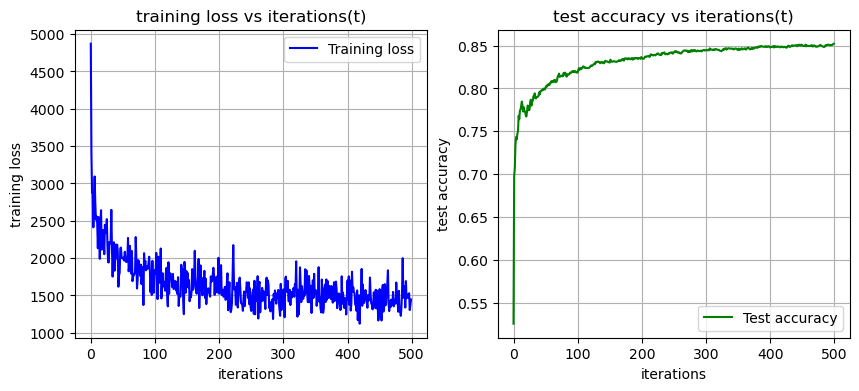

In [7]:
B_sizes = [1, 10, 100, 1000]
for b in B_sizes:
    tic = time.process_time()
    mem = SGD(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=b, learning_rate=0.01)
    toc = time.process_time()
    print("Time taken for training with batch size", str(b), "is", "{:.2f}".format(toc - tic), "seconds")
    
    y_hat = predict(mem["W"], X_test)
    acc = accuracy_score(np.argmax(y_test, axis=0), np.argmax(y_hat, axis=0))
    print("Accuracy of the classifier:", acc)
    
    costs = mem["training_loss"]
    accuracy = mem["test_accuracy"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(costs, color='blue', label='Training loss')
    ax1.set_title('training loss vs iterations(t)')
    ax1.set_xlabel('iterations')
    ax1.set_ylabel('training loss')
    ax1.grid(True)
    ax1.legend()

    # plot the second subplot with accuracy data
    ax2.plot(accuracy, color='green', label='Test accuracy')
    ax2.set_title('test accuracy vs iterations(t)')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('test accuracy')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()

## Role of batch size:
1. Larger batch size is used when we want to train more data at a time which leads to faster training, but it is computationaly expensive and requires more memory which limits size of models trained.
2. Smaller batch size leads to slower training, but smaller batchs require less memory and less computationl power which inturn helps in training larger models by processing fewer training examples.

Time taken for training with new train set of size 100 is 2.20 seconds
Accuracy of the classifier: 0.6498


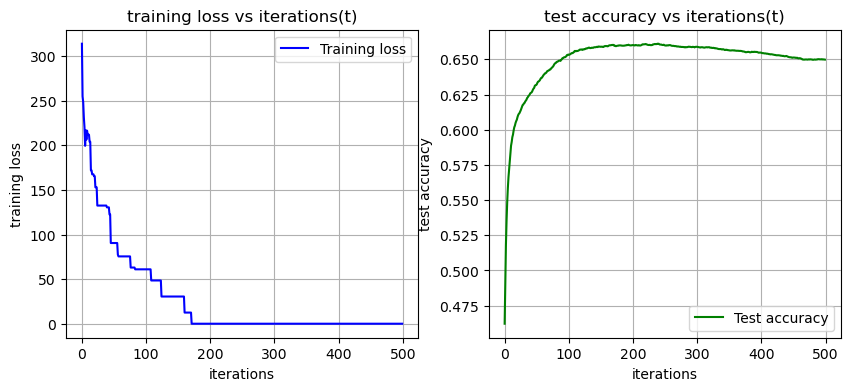

Time taken for training with new train set of size 500 is 2.89 seconds
Accuracy of the classifier: 0.8211


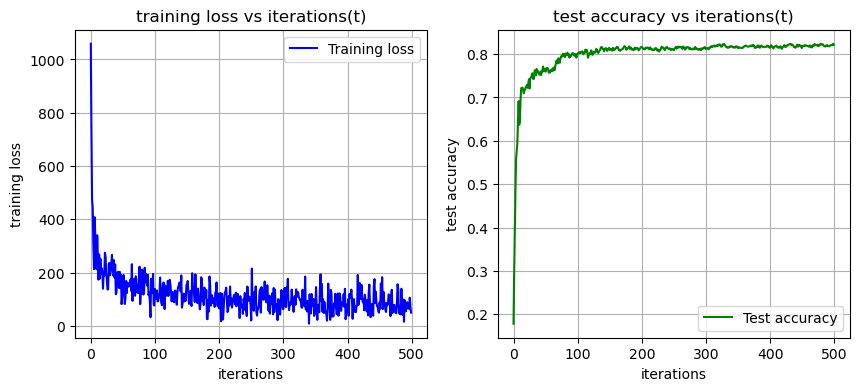

Time taken for training with new train set of size 1000 is 3.61 seconds
Accuracy of the classifier: 0.8303


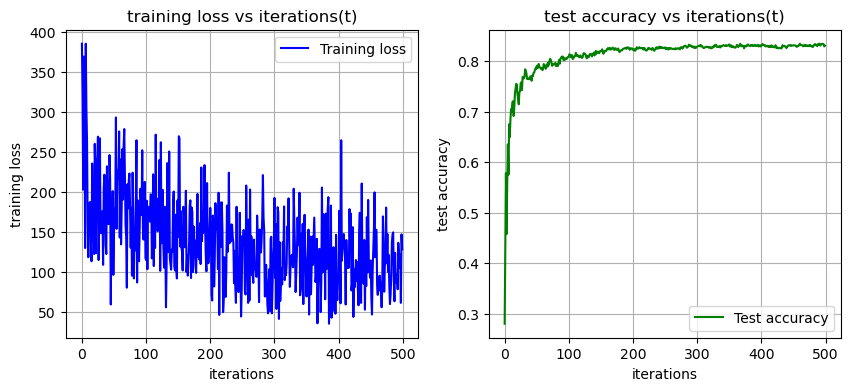

Time taken for training with new train set of size 10000 is 16.36 seconds
Accuracy of the classifier: 0.8499


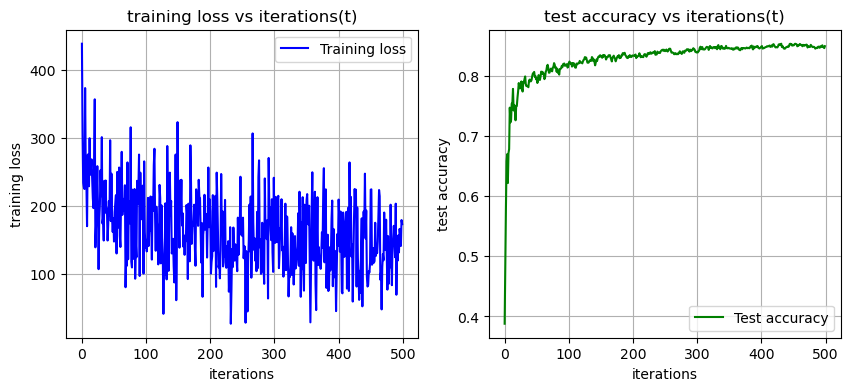

In [8]:
N = [100, 500, 1000, 10000]
X_train_set = X_train
y_train_set = y_train


for n in N:
    m = X_train_set.shape[1]
    permutation = torch.randperm(m).tolist()
    shuffled_X = X_train_set[:, permutation]
    shuffled_Y = y_train_set[:, permutation]
    X_train_new = shuffled_X[:, 0:n]
    y_train_new = shuffled_Y[:, 0:n]
    
    keep_indices = np.ones(shuffled_X.shape[1], dtype=bool)
    keep_indices[:n] = False
    
    X_train_set = shuffled_X[:, keep_indices]
    y_train_set = shuffled_Y[:, keep_indices]
    
    
    tic = time.process_time()
    mem = SGD(X_train_new, X_test, y_train_new, y_test, num_epochs=500, batch_size=100, learning_rate=0.01)
    toc = time.process_time()
    print("Time taken for training with new train set of size", str(n), "is", "{:.2f}".format(toc - tic), "seconds")
    
    y_hat = predict(mem["W"], X_test)
    acc = accuracy_score(np.argmax(y_test, axis=0), np.argmax(y_hat, axis=0))
    print("Accuracy of the classifier:", acc)
    
    costs = mem["training_loss"]
    accuracy = mem["test_accuracy"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(costs, color='blue', label='Training loss')
    ax1.set_title('training loss vs iterations(t)')
    ax1.set_xlabel('iterations')
    ax1.set_ylabel('training loss')
    ax1.grid(True)
    ax1.legend()

    # plot the second subplot with accuracy data
    ax2.plot(accuracy, color='green', label='Test accuracy')
    ax2.set_title('test accuracy vs iterations(t)')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('test accuracy')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()


## Accuracy as a function of dataset size:
1. Accuracy of the model increases as the training dataset size increases.
2. This is due to the fact that larger datasets offer samples of the underlying population that are more diverse and representative, which helps models to better generalize to new data.
3. But it is going to be computationally expensive to train on a larger data.

In [9]:
# Define the batch size
batch_size = 100

# Define the model
model = torch.nn.Linear(784, 10)  # 784 input features, 10 output classes

# Define the loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Define the optimizer
lr = 0.008
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Train the model
num_epochs = 500

for epoch in range(num_epochs):
    (minibatch_X, minibatch_y) = random_minibatches(X_train, y_train, batch_size)
    # Forward pass
    outputs = model(minibatch_X.T).T
    loss = loss_fn(outputs, minibatch_y)
        
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()